# Homework 2: Random variables

*Instructions:*
Please answer the following questions and submit your work
by editing this jupyter notebook and submitting it on Canvas.
Questions may involve math, programming, or neither,
but you should make sure to *explain your work*:
i.e., you should usually have a cell with at least a few sentences
explaining what you are doing.

Several times below I ask you to compare the results of a simulation to a theoretical distribution.
Here is a function that makes this easy:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
pd.set_option('display.float_format', lambda x: '%.6f' % x) #code ripped from the internet that ensures that things are written in decimals and not scientfic notation

rng = np.random.default_rng()


def comparison_table(x, expected, *sims):
    """
    Returns a pandas DataFrame with columns corresponding to:
    x: the possible values                         AS A NP ARRAY
    expected: the expected frequencies these should happen at            EXPECTED VALUES 
    sim1, sim2, ...: these are vectors of simulated values that       #SUPPOSED TO BE AN ARRAY 
        will be tabulated, and the frequencies of each of the values
        of x will be put in a column in the result.
    """
    df = pd.DataFrame(data={"x" : x})
    df['expected'] = expected
    for k, sim in enumerate(sims):
        total = len(sim)
        n = [np.sum(sim == y)/total for y in x]
        df[f"sim{k}"] = n
    df.style.format("{:.3f}")
    return df

For instance, here I'm simulating 1000 draws, twice, from a fair die (i.e., uniform draws from 1, 2, 3, 4, 5, 6)
and using the function to see if it's close to the expected proportions of 1/6.  Note that `expected` is a vector of length 6, but `sim1` and `sim2` are vectors of length 1000.
A good way to check your numbers are "close enough" is to do the simulations two or three times (like I do here),
and so check that the differences between simulations are similar to the difference to the expected column.

In [2]:
n = 1000
x = np.arange(1, 7)
expected = np.repeat(1/6, 6)
sim1 = rng.choice(x, size=n, replace=True)
sim2 = rng.choice(x, size=n, replace=True)

sim1
comparison_table(x, expected, sim1, sim2)


,x,expected,sim0,sim1
0,1,0.166667,0.161000,0.179000
1,2,0.166667,0.157000,0.174000
2,3,0.166667,0.193000,0.164000
3,4,0.166667,0.163000,0.151000
4,5,0.166667,0.169000,0.175000
5,6,0.166667,0.157000,0.157000


## 1. The Binomial distribution

A random variable $X$ has a Binomial($n$, $p$) distribution if
$\mathbb{P}\{ X = k \} = \binom{n}{k} p^k (1-p)^{n-k}$,
where $\binom{n}{k} = n! / (k! (n-k)!)$,
for $0 \le k \le n$.

*(a)* This has the following interpretation:
suppose you try to do something $n$ times, and each time the chance you succeed is $p$,
independently of everything else.
$X$ is the total number of successes.
Write a function to simulate a random number in this way.

*(b)* Check your function by simulating at least 10,000 random draws
with $n=20$ and $p=0.3$,
and making a table comparing the observed and expected proportions of these draws that are $k$
for each $0 \le k \le 20$.

*(c)* Make up a story in which you'd get a Binomial distribution,
being clear exactly which are the numbers that could be plotted to show the distribution.

*Note:* you can do the factorial, $n!$, by `math.factorial( )`.

**Explanation for Part A**
We want to simulate the number of sucesses in n-attempts with each chance of succeeding being independent. Each time you succeed you want to increment the amount of successes. In this case we quanitfy a success as rng.uniform being < p_success.

**Code for A Below**



In [3]:
def binomial_sim(n_draws, p_success):
    counter = 0
    for i in range(1,n_draws):
        if rng.uniform() < p_success:
            counter += 1
    return counter
binomial_sim(20,.3)


6

**Explanation for part B**
First things first is that we will need to build what the expected binomial distribution should be. Following the equations above, we can build what the distribution should be. We then will need to simulate the with our function in comparison. For this simulation, DO NOT divide by 10000 after getting the value counts because the comparison function above actually does that for us :). Now finally we being good simulators should do multiple simulations to see if our samples truly match what is expected. While the code only shows 2 simulations at a time, I did run it multiple times, enough to be reasonably confident that it works as intended

**Code for B below**

In [4]:
#Code to find the expected binomial distribution values

def a_choose_b(a,b):
    #DEFINING THIS FOR ALL FUTURE PROJECTS where its (a,b) (a choose b)
    return math.factorial(a)/((math.factorial(b) * (math.factorial(a-b))))

def binomial_expected(n, p_success, number_successes):     #calculating the number of expected successes using the formula above
    return  a_choose_b(n, number_successes) * (p_success**number_successes) * ((1-p_success)**(n-number_successes))


In [5]:
x = np.arange(1,21)
expected = np.array([])

for i in range(1,21):
    expected = np.append(expected, float(binomial_expected(20,.3,i)))

binom_sim1 = np.array([])
for i in range(1,10000):
    binom_sim1 = np.append(binom_sim1,binomial_sim(20,.3))

binom_sim2 = np.array([])
for i in range(1,10000):
    binom_sim2 = np.append(binom_sim2,binomial_sim(20,.3))

comparison_table(x, expected,binom_sim1,binom_sim2)


,x,expected,sim0,sim1
0,1,0.006839,0.010001,0.008901
1,2,0.027846,0.035604,0.034903
2,3,0.071604,0.081008,0.087809
3,4,0.130421,0.146415,0.147515
4,5,0.178863,0.192619,0.187319
5,6,0.191639,0.194519,0.187219
6,7,0.164262,0.153715,0.156416
7,8,0.114397,0.102910,0.100910
8,9,0.065370,0.049105,0.053405
9,10,0.030817,0.022202,0.023202


**Response to Part C**

Here's my story! Once upon a time there was a University of Oregon student doing his genetics homework. For some reason, this homework involved him randomy interviewing people, marking down what their eye colors were (Assume that theres only blue and brown). Assuming that the university of Oregon matches the general U.S population with 95% of people having brown eyes, and 5% of people having blue eyes, and that each person he surveyed was an independent event. He also surveyed 100 people at a time, counting how many times he was getting blue eyes in each sample. This corresponds to a binomial distribution of (100, .05), as he surveyed 100 people in each sample, with a .05 percent chance of success 

## 2. The Poisson distribution

A random variable $X$ has a Poisson($\lambda$) distribution if
$\mathbb{P}\{ X = k \} = \frac{\lambda^k}{k!} e^{-\lambda}$,
for $k \ge 0$.

*(a)* The Poisson distribution is a good approximation for
"the number of rare events", i.e., for the Binomial when $n$ is large but $p$ is small.
Simulate at least 10,000 draws from the Poisson($5$) distribution
and compare their distribution to
the same number of draws from the Binomial(10, 0.5), the Binomial(100, 0.05), and the Binomial(1000, 0.005).
*(Note: you may use `rng.binomial( )` instead of the function you wrote above.)*

*(b)* Make up a story in which you might get the Poisson distribution,
being clear exactly which are the numbers that could be plotted to show the distribution.

*(c)* Suppose that $X \sim \text{Poisson}(5)$. Write down a mathematical expression for $\mathbb{E}[X (X-1)]$
using the definition of expectation, and evaluate it either with math or simulation.

**Code for Part A**

For the code below were going to call the rng poisson distribution because the rng module is so great. Then we're going to compare that the binomial distributions that are given above. When using the compare table function, we need to pass in an "expected" argument but that doesn't actually make sense for us in this moment. So in the code below what I did was pass in a previous set of expected values, but then promptly deleted them from the dataframe. 


In [7]:

trial_number = 10000
poisson_sim1= rng.poisson(5, trial_number)
binom_10 = rng.binomial(10,.5,size=trial_number)
binom_100 = rng.binomial(100, .05, size=trial_number)
binom_1000 = rng.binomial(1000, .005, size=trial_number)
x = np.arange(1,21)
expected 
comparison_table(x,expected,binom_10,binom_100,binom_1000,poisson_sim1)[['x', 'sim0', 'sim1', 'sim2','sim3']].rename(columns = {'sim0': "binom_10", 'sim1': 'binom_100','sim2': 'binom_1000', 'sim3': 'poisson'})

    

,x,binom_10,binom_100,binom_1000,poisson
0,1,0.009800,0.031100,0.035200,0.035400
1,2,0.048400,0.080200,0.089500,0.082000
2,3,0.119100,0.135700,0.136200,0.141800
3,4,0.208400,0.182600,0.174100,0.179800
4,5,0.245800,0.180100,0.174700,0.171700
5,6,0.196700,0.154700,0.146900,0.145800
6,7,0.117900,0.100300,0.101300,0.102200
7,8,0.041200,0.064400,0.063800,0.063500
8,9,0.010200,0.035500,0.035200,0.038200
9,10,0.001400,0.018000,0.021000,0.019900


**Response to Part A**

After looking at the comparison table for the Poisson distribution to the given binom draws, it appears that the poisson distribution is really comparable to the binomial distrubtions that have a large number of draws and a small amount of successes. For example, in the distributions above you would expect about 5 successes in each of the binomial distributions, however as the success chance gets rarer and rarer, with the number of trials increasing, the poisson distribution gets better at approximating the binomial distribution. In the comparison above, it seems the binomial distribution of (1000,.005) is nearly identical to the poission(5) distribution. 

**Response to Part B**

Heres my story! Once upon a time there was a king named Magnus who ruled Norway. Magnus loved to eat chocolate and banana bread. However Norway was in trouble because it was constantly getting attacked by bandits. These bandits on average attacked Magnus' kingdom 3 times a year, or once every 122 days. Assuming that each bandit attack was independent, and all years were independent of eachother, the poisson(3) distribution would show up in these cases if magnus were to gather data across many trials (years, and yes this isnt feasible). Specificially, he would plot number of attacks in one year. Many years after magnus died, his sons would then use the poisson distribution to make Norways defenses stronger, and safer from bandits. The End  (my roommate Magnus was sitting across from me while writing this)


**Response to Part C**
*(c)* Suppose that $X \sim \text{Poisson}(5)$. Write down a mathematical expression for $\mathbb{E}[X (X-1)]$
using the definition of expectation, and evaluate it either with math or simulation.

Writing the expected expectation. Ripping straight from the Random_variables slides we find the expected value is the following equation: $$ \E[f(X)] = \sum_x f(x) \P\{X = x\} . $$ In this case we also are given waht P(X = x) is, it's the poisson distribution of 5. So finally, we need to find f(x), which is (X * (X-1). So the mathematical expression for  $\mathbb{E}[X (X-1)]$ is as follows: Summation( (X*(X-1) * $\mathbb{P}\{ X = k \} = \frac{5^k}{k!} e^{-5}$)


Well if I'm interpreting this right, we want to find the expected value of the Poisson 5 distribution multiplied by the expected value of the Poisson(5) - 1. So to do this with a simulation I'm going to generate a poisson 5 distribution, subtract 1 from it, and multiply the original distribution by the -1 distribution and then take the mean of it(because thats what an expected value is). After evaluating through simulation it appears that it's about 25

**Code To Part C**

In [18]:

#Evaluating By Simulation
poisson_5 = rng.poisson(5,10000)
subtracted_1 = poisson_5 - 1
expected_value = np.mean(poisson_5 * subtracted_1)
expected_value


25.3216

## 3. The Normal distribution

The Normal distribution is *additive*,
meaning that if $X_1$ is Normal with mean $\mu_1$ and variance $\sigma^2_1$
and $X_2$ is Normal with mean $\mu_2$ and variance $\sigma^2_2$, independent of $X_1$,
then $X_1 + X_2$ is again Normal, with mean $\mu_1 + \mu_2$ and variance $\sigma_1^2 + \sigma_2^2$.

*(a)* Simulate a large number of draws of $X_1$ and $X_2$ above
with $\mu_1 = 0$, $\sigma^2_1 = 2$, $\mu_2 = 3$, and $\sigma^2_2 = 1.5$,
and compare the distribution to $X_3 \sim \text{Normal}(3, 3.5)$
by plotting the histogram of $X_1 + X_2$
and the histogram of draws from the second Normal.

*(b)* One way the Normal distribution arises is by *adding* together lots of *independent*
things (e.g., the cumulative effect of lots of small, additive errors).
Make up a story in which you might get a Normal distribution,
being clear exactly which are the numbers that could be plotted to show the distribution. 

Text(0.5, 1.0, 'X1 and X2 Added Graph')

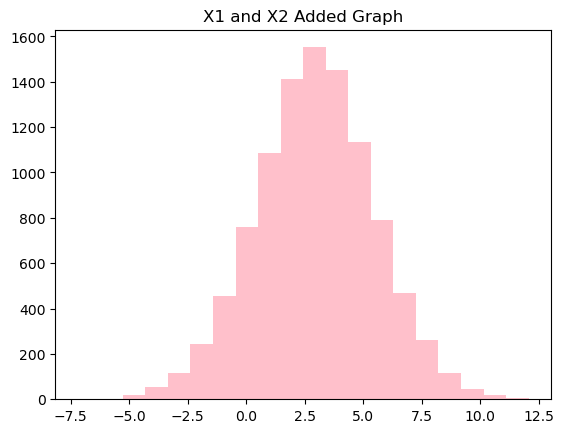

In [50]:
X1 = rng.normal(0,2, size = 10000)
X2 = rng.normal(3,1.5,size =10000) 
X3 = rng.normal(3,3.5, size = 10000)

plt.hist(X1 + X2, bins = 20, color = 'pink')
plt.title("X1 and X2 Added Graph")


Text(0.5, 1.0, 'X3 Graph')

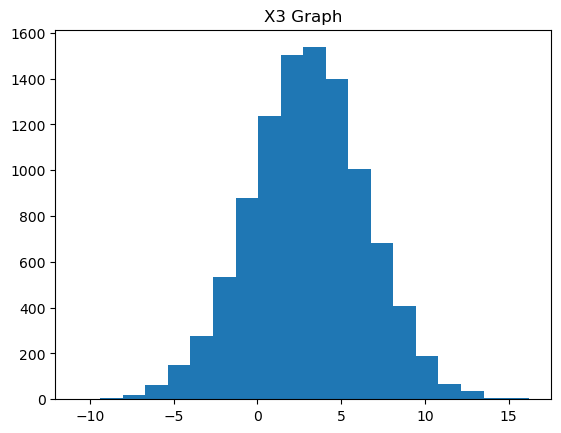

In [51]:
plt.hist(X3, bins = 20)
plt.title("X3 Graph")

**Response To Part B**

Heres my story! Once upon a time there was a Professor named Reter Palph who taught biology. Interested in the American population, he wanted to conduct some basic assessments on health. He then gathered a representative sample of Adults in the U.S and made them take a survey that recorded weight, height, shoe size, and other basic information. Reter Palph then seperated the data, and only graphed data using histograms makign seperate plots for each piece of information. He found that many of distributions for the health statistics were roughly normal.